# Final project
## Team member
- Yiran Shen (48907570)
- Rylee Wang (95006185)
- Yeongu Choe (77672566)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Topic: We are trying to find impact of COVID on Tourism industry


## Background

Following the COVID-19 outbreak, it became a global crisis in the last couple of years. The COVID-19 pandemic has had a profound impact on the tourism industry, which is one of the sectors most affected by the pandemic. In an effort to slow the spread of the virus, many countries implemented strict measures such as travel restrictions, mandatory quarantines, and lockdowns. These measures have led to a significant decline in tourist arrivals and spending, resulting in job losses and economic disruption. In this project, we will explore the factors that have impacted the tourism industry during the COVID-19 pandemic over 6 countries.

## Dataset
We retrieved data on 6 countries that were popular tourist destinations including the United States, Canada, China, South Korea, Japan and Brazil prior to the Covid-19 pandemic and conducted a comparative analysis of the changes in the tourism industry before and after the outbreak.

## Outline

#### 1.Comparison of tourism expenditure before and after the Covid pandemic
#### 2.Examining the number of face mask covering  in countries
#### 3.Examining the global unemployment rate in 2019 and 2020
#### 4.Examining the number of face mask covering  in countries
#### 5.Effect of travel restriction on the expenditure of tourism

## Read CSV files

In [29]:
rawHomeRestrictionData = pd.read_csv("./src/stay-at-home-covid.csv")
rawFaceCoveringData = pd.read_csv("./src/face-covering-policies-covid.csv")
rawInternationalTravelControlData = pd.read_csv("./src/international-travel-covid.csv")
monthlyCanadaHotelInfo = pd.read_csv("./src/MonthlyCanadaHotel.csv")
# Mobility data
brazil2020Mobility=pd.read_csv("./src/2020 mobility/2020_BR_Region_Mobility_Report.csv", low_memory=False)
canada2020Mobility=pd.read_csv("./src/2020 mobility/2020_CA_Region_Mobility_Report.csv", low_memory=False)
japan2020Mobility=pd.read_csv("./src/2020 mobility/2020_JP_Region_Mobility_Report.csv", low_memory=False)
korea2020Mobility=pd.read_csv("./src/2020 mobility/2020_KR_Region_Mobility_Report.csv", low_memory=False)
mexico2020Mobility=pd.read_csv("./src/2020 mobility/2020_MX_Region_Mobility_Report.csv", low_memory=False)
us2020Mobility=pd.read_csv("./src/2020 mobility/2020_US_Region_Mobility_Report.csv", low_memory=False)

brazil2021Mobility=pd.read_csv("./src/2021 mobility/2021_BR_Region_Mobility_Report.csv", low_memory=False)
canada2021Mobility=pd.read_csv("./src/2021 mobility/2021_CA_Region_Mobility_Report.csv", low_memory=False)
japan2021Mobility=pd.read_csv("./src/2021 mobility/2021_JP_Region_Mobility_Report.csv", low_memory=False)
korea2021Mobility=pd.read_csv("./src/2021 mobility/2021_KR_Region_Mobility_Report.csv", low_memory=False)
mexico2021Mobility=pd.read_csv("./src/2021 mobility/2021_MX_Region_Mobility_Report.csv", low_memory=False)
us2021Mobility=pd.read_csv("./src/2021 mobility/2021_US_Region_Mobility_Report.csv", low_memory=False)
unemployment = pd.read_csv("./src/2019 2020 unemployment.csv")

### Extract data from US, Canada, Mexico, Brazil, China, Japan and South Korea

In [30]:
# 0: No policy
# 1: Recommended by government not to leave home
# 2: Required not to leave except for grocery shopping
# 3: Required not to leave home
HomeRestriction = rawHomeRestrictionData.loc[(rawHomeRestrictionData["Entity"] == "United States")
                                             | (rawHomeRestrictionData["Entity"] == "Canada")
                                             | (rawHomeRestrictionData["Entity"] == "Mexico")
                                             | (rawHomeRestrictionData["Entity"] == "Brazil")
                                             | (rawHomeRestrictionData["Entity"] == "China")
                                             | (rawHomeRestrictionData["Entity"] == "Japan")
                                             | (rawHomeRestrictionData["Entity"] == "South Korea")]
HomeRestriction


,Entity,Code,Day,stay_home_requirements
25208,Brazil,BRA,2020-01-01,0
25209,Brazil,BRA,2020-01-02,0
25210,Brazil,BRA,2020-01-03,0
25211,Brazil,BRA,2020-01-04,0
25212,Brazil,BRA,2020-01-05,0
...,...,...,...,...
192978,United States,USA,2022-12-27,1
192979,United States,USA,2022-12-28,1
192980,United States,USA,2022-12-29,1
192981,United States,USA,2022-12-30,1


In [31]:
# 0: No policy
# 1: Recommended by government
# 2: Required in some public spaces
# 3: Required in all public spaces
# 4: Required outdoor all times
FaceCoveringPolicy = rawFaceCoveringData.loc[(rawFaceCoveringData["Entity"] == "United States")
                                       | (rawFaceCoveringData["Entity"] == "Canada")
                                       | (rawFaceCoveringData["Entity"] == "Mexico")
                                       | (rawFaceCoveringData["Entity"] == "Brazil")
                                       | (rawFaceCoveringData["Entity"] == "China")
                                       | (rawFaceCoveringData["Entity"] == "Japan")
                                       | (rawFaceCoveringData["Entity"] == "South Korea")]
FaceCoveringPolicy


,Entity,Code,Day,facial_coverings
25208,Brazil,BRA,2020-01-01,0
25209,Brazil,BRA,2020-01-02,0
25210,Brazil,BRA,2020-01-03,0
25211,Brazil,BRA,2020-01-04,0
25212,Brazil,BRA,2020-01-05,0
...,...,...,...,...
193264,United States,USA,2022-12-27,2
193265,United States,USA,2022-12-28,2
193266,United States,USA,2022-12-29,2
193267,United States,USA,2022-12-30,2


## Relationship between mask policy to number of inbound tourists


In [32]:
# 0: No policy
# 1: Screening travellers
# 2: 2 weeks quarantine for travellers from high risk regions
# 3: Ban any travellers from high risk countries
# 4: Close border (No foreigners enter the country)
InternationalTravelControl = rawInternationalTravelControlData.loc[(rawInternationalTravelControlData["Entity"] == "United States")
                                          | (rawInternationalTravelControlData["Entity"] == "Canada")
                                          | (rawInternationalTravelControlData["Entity"] == "Mexico")
                                          | (rawInternationalTravelControlData["Entity"] == "Brazil")
                                          | (rawInternationalTravelControlData["Entity"] == "China")
                                          | (rawInternationalTravelControlData["Entity"] == "Japan")
                                          | (rawInternationalTravelControlData["Entity"] == "South Korea")]
InternationalTravelControl


,Entity,Code,Day,international_travel_controls
25208,Brazil,BRA,2020-01-01,0
25209,Brazil,BRA,2020-01-02,0
25210,Brazil,BRA,2020-01-03,0
25211,Brazil,BRA,2020-01-04,0
25212,Brazil,BRA,2020-01-05,0
...,...,...,...,...
192986,United States,USA,2022-12-27,1
192987,United States,USA,2022-12-28,1
192988,United States,USA,2022-12-29,1
192989,United States,USA,2022-12-30,1


In [33]:
CanadaHotelOccupancyRate = monthlyCanadaHotelInfo.iloc[:,2]
CanadaHotelOccupancyRate


0      50.4%
1      58.4%
2      32.1%
3      13.6%
4      18.8%
5      24.8%
6      33.7%
7      41.8%
8      38.4%
9      31.4%
10     27.8%
11     22.5%
12     22.5%
13     27.5%
14     32.4%
15     29.7%
16     28.3%
17     36.9%
18     54.6%
19       66%
20     58.4%
21     51.6%
22     49.7%
23     42.6%
24     32.6%
25     43.8%
26     53.2%
27     57.5%
28     63.3%
29       72%
30     75.9%
31     76.6%
Name:  Occupancy Rate, dtype: object

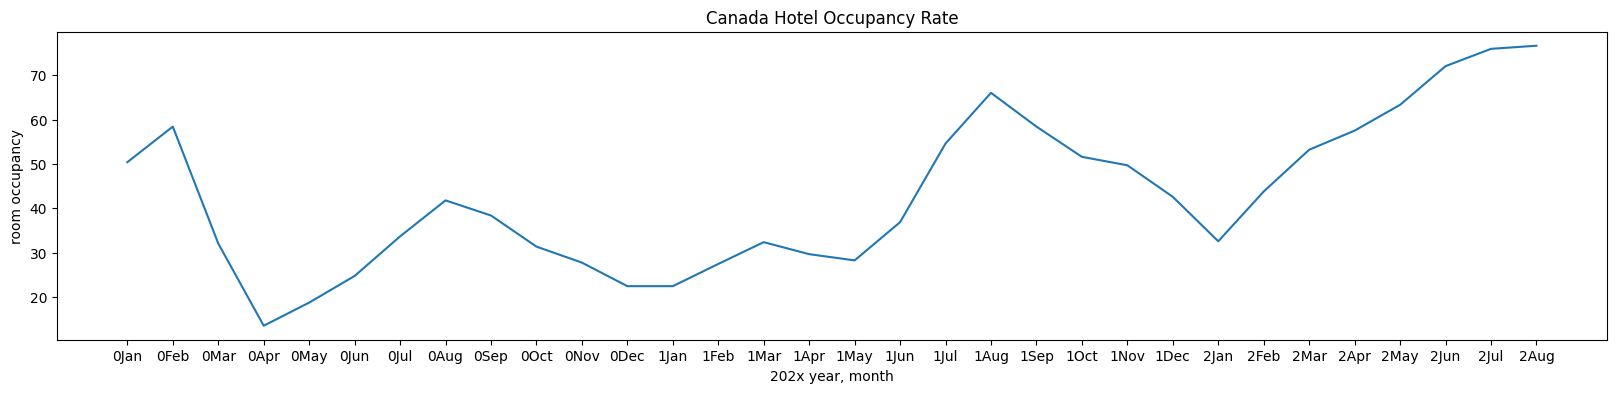

In [34]:
# Generate months and assign it to x
def getMonths(year):
    year = str(year)
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for i in range(12):
        months[i] = year+months[i]
    return months


x = getMonths(0)+getMonths(1)+getMonths(2)
x = x[:32]  # Get year,month to 2022 Jun

# Convert str to int and assign the list to y


def getOccupancies(occupancyList):
    percentageList = []
    for i in range(len(occupancyList)):
        theStr = occupancyList[i][1:]
        theStr = theStr.strip("%")
        percentageList.append(float(theStr))
    return percentageList


y = getOccupancies(CanadaHotelOccupancyRate)

# Make it into graph
fig,ax = plt.subplots(figsize=(20, 4))
plt.title("Canada Hotel Occupancy Rate")
ax.set_xlabel("202x year, month")
ax.set_ylabel("room occupancy")
ax.plot(x,y)



In [35]:
# API: process mobility dataframe
def dataProcessor(df):
    return df.iloc[:, [1, 8, 9, 10, 11, 12, 13, 14]]


dataProcessor(canada2020Mobility)


,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Canada,2020-02-15,4.0,2.0,10.0,3.0,1.0,0.0
1,Canada,2020-02-16,13.0,8.0,41.0,4.0,0.0,-2.0
2,Canada,2020-02-17,-12.0,-15.0,63.0,-28.0,-52.0,11.0
3,Canada,2020-02-18,-1.0,4.0,6.0,-1.0,-1.0,1.0
4,Canada,2020-02-19,1.0,1.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
76898,Canada,2020-12-26,-52.0,NaN,NaN,NaN,-31.0,NaN
76899,Canada,2020-12-28,-42.0,NaN,NaN,NaN,-62.0,NaN
76900,Canada,2020-12-29,-37.0,NaN,NaN,NaN,-46.0,NaN
76901,Canada,2020-12-30,-31.0,NaN,NaN,NaN,-44.0,NaN


In [36]:
departureFromCanada = pd.read_csv("./Canada outbound.csv")
departureFromCanada

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,OBND_DEP_TOTAL,Total international departures,2008,2008,NBR,Number,0,Units,NaN,NaN,5841400.000,NaN,NaN
1,AUS,Australia,OBND_DEP_TOTAL,Total international departures,2009,2009,NBR,Number,0,Units,NaN,NaN,6226500.000,NaN,NaN
2,AUS,Australia,OBND_DEP_TOTAL,Total international departures,2010,2010,NBR,Number,0,Units,NaN,NaN,7055200.000,NaN,NaN
3,AUS,Australia,OBND_DEP_TOTAL,Total international departures,2011,2011,NBR,Number,0,Units,NaN,NaN,7765900.000,NaN,NaN
4,AUS,Australia,OBND_DEP_TOTAL,Total international departures,2012,2012,NBR,Number,0,Units,NaN,NaN,8206000.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,ROU,Romania,FRA,France,2020,2020,NBR,Number,0,Units,NaN,NaN,9135.000,NaN,NaN
3737,GBR,United Kingdom,PRT,Portugal,2021,2021,NBR,Number,0,Units,NaN,NaN,1159413.403,NaN,NaN
3738,GBR,United Kingdom,GRC,Greece,2021,2021,NBR,Number,0,Units,NaN,NaN,1132306.091,NaN,NaN
3739,IDN,Indonesia,OBND_DEP_OVERNIGHT,Overnight visitors (tourists),2021,2021,NBR,Number,0,Units,NaN,NaN,502955.548,NaN,NaN


# Global unemployment in 2019 and 2020
According to the displayed graph, the COVID-19 pandemic has resulted in significant job losses globally, with youth and women being disproportionately affected. In 2020, the global unemployment rate has increased by 1.1 % compare to year 2019, reaching 6.5%, and the number of unemployed individuals increased by 33 million to reach 220 million. Additionally, 81 million individuals withdrew from the labour market altogether. Unemployment rates in Latin America and the Caribbean, as well as in Europe and Northern America, increased by at least 2 %.

Youth and women experienced a greater impact, with employment losses of 8.7 % and 5.0 %, respectively, compared to 3.7% for adults and 3.9 per cent for men. Prior to the pandemic, youth unemployment rates were three times higher than those of adults. During the crisis, women were more likely than men to leave the labour market to care for their children, resulting in further widening of gender disparities in labour force participation rates.

,Region,2019,2020
0,Northern Africa and Western Asia,10.6,11.7
1,Latin America and the Caribbean,8.0,10.3
2,Europe and Northern America,5.4,7.4
3,Central and Southern Asia,5.3,6.8
4,Sub-Saharan Africa,6.0,6.3
5,Australia and New Zealand,5.0,6.3
6,Eastern and South-Eastern Asia,3.9,4.3
7,Oceania,3.3,3.7


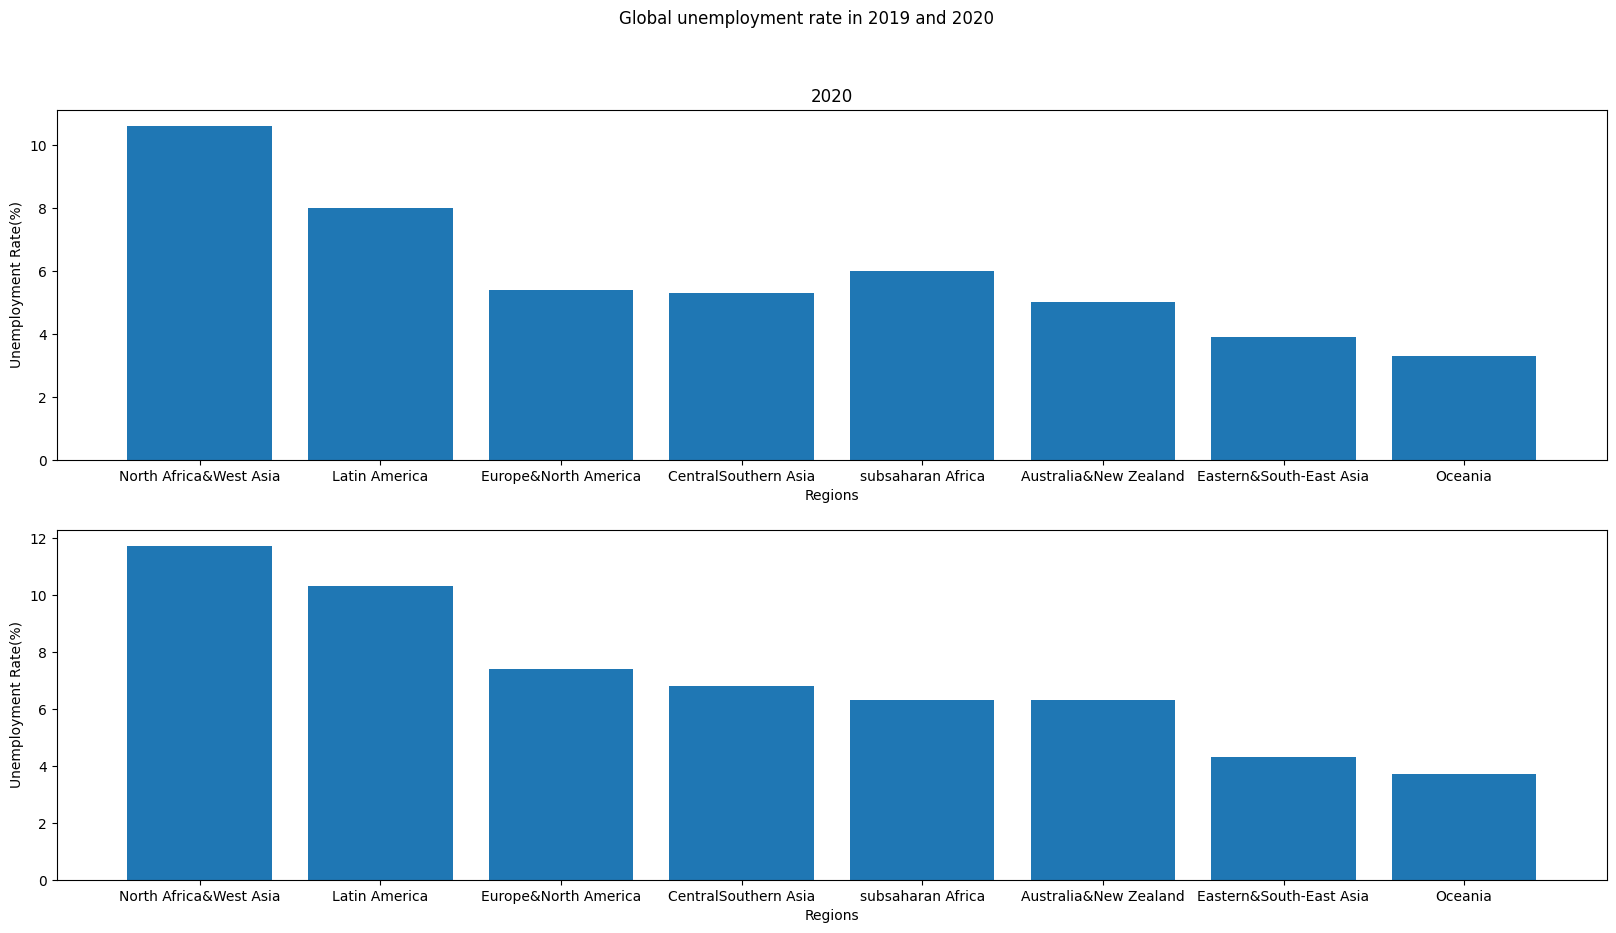

In [47]:
# 2019, 2020 data bar chart
# x axis: Regions
# y axis: Unemployment Rate(%)
# Title: Global unemployment rate in 2019 and 2020
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
plt.suptitle("Global unemployment rate in 2019 and 2020")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Unemployment Rate(%)")
ax1.set_title("2019")
ax2.set_xlabel("Regions")
ax2.set_ylabel("Unemployment Rate(%)")
ax2.set_title("2020")
regions = ["North Africa&West Asia",
           "Latin America",
           "Europe&North America",
           "CentralSouthern Asia",
           "subsaharan Africa",
           "Australia&New Zealand",
           "Eastern&South-East Asia",
           "Oceania"]
ax1.bar(regions, unemployment["2019"])
ax2.bar(regions, unemployment["2020"])
unemployment


## Conclusion

Overall, The COVID-19 pandemic has had a significant impact on the tourism industry. The closure of schools and workplaces has resulted in job losses in the tourism industry sector, and the mandatory use of masks has affected the hospitality industry. The decline in international travel has led to a loss of revenue for businesses and governments. The tourism industry has been one of the hardest-hit sectors of the economy, and it will take some time for the industry to recover fully.


## Limitations

The analysis is limited by the fact that it only considers a limited number of countries and popular tourist destinations, which does not include European countries. The impact of the pandemic on the tourism industry may vary across different countries and regions, and the analysis may not be representative of the entire industry.

## Areas for further research

Future research could explore the impact of the pandemic on specific segments of the tourism industry, such as business travel, luxury travel, and adventure travel. The analysis could also consider the impact of the pandemic on different types of tourism, such as cultural tourism, eco-tourism, and medical tourism. Moreover, the analysis could explore the long-term impact of the pandemic on the tourism industry and the measures that can be taken to support the recovery of the industry.
